In [1]:
import numpy as np
from scipy.sparse import csc_array,csr_array,diags_array
from scipy.sparse import random_array
import matplotlib.pyplot as plt
from scipy.special import expit
from numpy import logaddexp
import qdldl
from obj import LogisticNLL
from glopt import GLMProblem
from numpy.random import default_rng


In [4]:
rng = default_rng(10)
m = 50000
n = 500
samp = lambda size:rng.uniform(low = -0.5,high = 0.5,size = size)
A = random_array((m,n),density = 0.01,rng = rng,data_sampler = samp)

x_true = rng.uniform(-0.1,1,n)

z_true = A@x_true

w = 100*np.ones(m)
y = rng.binomial(w.astype(int),expit(z_true))/w

Q = 1.*diags_array(np.ones(n))
xx = rng.normal(size = n)

C = random_array((500,n),
                 density = 0.2,rng = rng,data_sampler = samp)

c = C@xx + 0.01
Q = 1e-7*diags_array(np.ones(n))
f = LogisticNLL(y,w)

In [48]:
np.hstack([y,np.zeros(3)])

array([0.52, 0.53, 0.55, ..., 0.  , 0.  , 0.  ])

In [ ]:
problem = GLMProblem(f,A,Q,C,c)
x,conv = problem.solve()

500 constraints
500 variables
50000 rows in A
────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ cons_viol  │    mu    │    Δx     │   step    │  KKT_res  │ cum_time │
────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 3.4657e+06 │ 7.6022e+00 │  6.7e+00 │  4.72e-02 │ 1.522e-03 │  1.14e+03 │     0.12s │
│    2 │ 3.4657e+06 │ 7.4663e+00 │  1.7e+00 │  2.76e-02 │ 1.788e-02 │  1.12e+03 │     0.20s │
│    3 │ 3.4640e+06 │ 7.3551e+00 │  1.7e+00 │  2.66e-02 │ 1.489e-02 │  1.10e+03 │     0.28s │
│    4 │ 3.4629e+06 │ 7.1601e+00 │  1.6e+00 │  5.04e-02 │ 2.651e-02 │  1.07e+03 │     0.36s │
│    5 │ 3.4612e+06 │ 7.0501e+00 │  1.6e+00 │  3.03e-02 │ 1.537e-02 │  1.05e+03 │     0.44s │
│    6 │ 3.4605e+06 │ 6.5792e+00 │  1.6e+00 │  1.36e-01 │ 6.680e-02 │  9.83e+02 │     0.52s │
│    7 │ 3.4579e+06 │ 6.0702e+00 │  1.5e+00 │  1.49e-01 │ 7.736e-02 │  9.07e+02 │     0.60s │
│    8 │ 3.4564e+

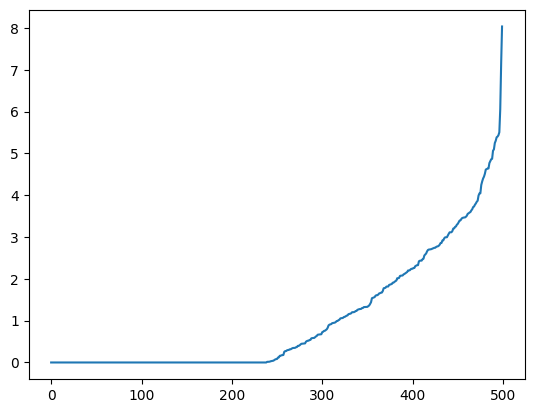

In [5]:
plt.plot(np.sort(c - C@x))

In [6]:
import cvxpy as cp
n = A.shape[1]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
neg_log_likelihood = cp.sum(
    cp.multiply(w,cp.logistic(A @ beta)- cp.multiply(y, A @ beta))
)
regularization = beta.T@Q@beta/2

problem  = cp.Problem(cp.Minimize(
    (neg_log_likelihood + regularization)),[C @ beta <= c]
)
problem.solve(verbose = True)

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Apr 18 09:17:30 PM: Your problem has 500 variables, 500 constraints, and 0 parameters.
(CVXPY) Apr 18 09:17:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 18 09:17:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 18 09:17:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 18 09:17:30 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 18 09:17:30 PM: Compiling problem (target solver=CLARABEL

3562671.3550049323

In [7]:
print(f(A@x) + (1/2) *x.T@Q@x)

cvx_x = beta.value
print(f(A@cvx_x) + (1/2) *cvx_x.T@Q@cvx_x)

3562671.355005345
3562671.3550049323
